In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
%matplotlib inline

[ 5.37068997e+03 -8.98066834e-03]
Set this PMT on 781.5184904789248 V


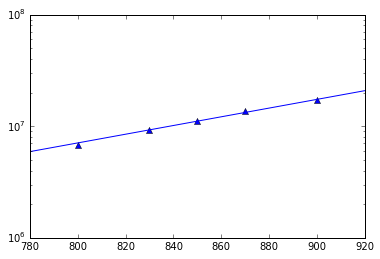

In [19]:




x_axis = np.array([800, 830, 850,870, 900])
#x_bot = np.array([1400,1450,1500,1550,1600])
#gain_LV1439 = np.array([6.743*10e5, 9.304*10e5, 11.174*10e5, 13.731*10e5,17.119*10e5])
# gain_LV1413 = np.array([3.24*10e5, 4.248*10e5, 5.12*10e5, 6.242*10e5, 8.376*10e5])
# gain_LV1421 = np.array([5.897*10e5, 8.103*10e5, 9.97*10e5, 11.949*10e5, 15.28*10e5])
# gain_LV1405 = np.array([3.731*10e5, 5.277*10e5, 6.433*10e5, 7.707*10e5, 10.176*10e5])
# gain_LV1418 = np.array([3.841*10e5 ,5.233*10e5, 6.228*10e5, 7.619*10e5, 10.061*10e5])
# gain_LV1371 = np.array([2.973*10e5 ,3.915*10e5, 4.829*10e5, 5.884*10e5, 7.862*10e5])
# gain_LV1388 = np.array([3.549*10e5, 5.091*10e5 ,5.904*10e5, 7.083*10e5, 9.212*10e5])
gain_bot = np.array([2.932*10e5, 3.982*10e5, 5.105*10e5, 6.754*10e5, 8.794*10e5])




def func(x, a, b):
    return a*np.exp(-b*x)


popt, pcov = curve_fit(func, x_axis, gain_LV1439, [5000,-0.001])
plt.plot(x_axis,gain_LV1439, 'b^')
x_axis=np.linspace(780,920,20)
#x_bot=np.linspace(1380,1620,20)
plt.plot(x_axis,func(x_axis,*popt))
plt.yscale('log')

print(popt)
set_voltage = -(np.log(6*10e5/popt[0]))/popt[1]
print("Set this PMT on", set_voltage,"V")

plt.show()



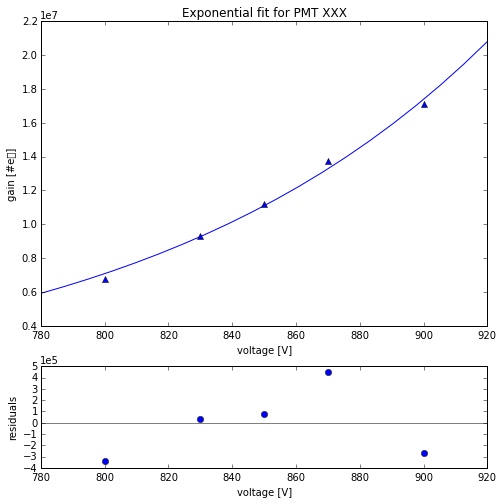

In [20]:





def func(x, a, b):
    return a*np.exp(-b*x)
x_axis = np.array([800, 830, 850,870, 900])
gain_LV1439 = np.array([6.743*10e5, 9.304*10e5, 11.174*10e5, 13.731*10e5,17.119*10e5])
fit_params, pcov = curve_fit(func, x_axis, gain_LV1439, [5000,-0.001])
a, b = fit_params
s = func(x_axis,a,b)
residuals = gain_LV1439 - s
axis_range=np.linspace(780,920,20)


fig = plt.figure(1, figsize=(8,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 2])
ax1 = fig.add_subplot(gs[0])
f_fit = np.linspace(780, 920., 20)
s_fit = func(f_fit, a,b)
ax1.plot(f_fit, s_fit)
ax1.plot(x_axis, gain_LV1439, 'b^')
plt.title("Exponential fit for PMT XXX")
ax1.set_ylabel("gain [#e⁻]")
ax1.set_xlabel("voltage [V]")
ax2 = fig.add_subplot(gs[1])
ax2.plot(x_axis, residuals, 'bo')
ax2.set_xlim([780, 920])
ax2.axhline(color="gray", zorder=0)
ax2.set_ylabel("residuals")
ax2.set_xlabel("voltage [V]")
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()
